## Lloyd's k-means algorithm

In this notebook, we implement Lloyd's k-means algorithm and test it on different types of data. In particular, we will construct examples where the algorithm gets stuck on local minima. 
 
**Copyright**: The implementation which we will use is slightly similar to the one found here:
https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

*For questions / bugs / suggestions, please contact me @ christoph.glanzer@ifor.math.ethz.ch*

We begin by loading some packages.

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from IPython.display import display, clear_output

The following function implements Lloyd's algorithm.

In [20]:
'''
Input:
    X is a mx2 numpy array, where every row corresponds to a point,
    K is the number of clusters,
    num_iter is the number of iterations,
    centers: If provided, the initialization of the cluster centers,
    plot: if set to true, generate a plot.
Output:
    a Kx2 numpy array, where every row corresponds to a cluster.
'''
def k_means_lloyd(X, K, num_iter = 10, centers = None, plot = True):
    # Initialize the cluster centers as a random sample from the data points
    if centers is None:
        centers = X[random.sample(range(len(X)),K),]
    
    # Main for loop
    for i in range(num_iter):
        
        # Step 1 of Lloyd's algorithm
        # Assign every point to its closest cluster
        clusters = {}
        for x in X:
            bestcenterindex = min([(j, np.linalg.norm(x-centers[j])) for j in range(len(centers))], key=lambda t:t[1])[0]
            try:
                clusters[bestcenterindex].append(x)
            except KeyError:
                clusters[bestcenterindex] = [x]
        
        # Step 2 of Lloyd's algorithm
        # Find new centers
        centers = []
        for k in sorted(clusters.keys()):
            centers.append(np.mean(clusters[k], axis=0))
        centers = np.array(centers)
        
        # Plot
        if plot:
            cmap = plt.cm.get_cmap(None,K)
            plt.clf()
            fig = plt.figure()
            plt.title("Iteration "+str(i+1))
            for l in range(K):
                plt.scatter(np.array(clusters[l])[:,0], np.array(clusters[l])[:,1], color = cmap(l), s = 5)
                plt.scatter(centers[l,0], centers[l,1], color = 'red', marker="X")
            fig.show()
            clear_output(wait=True)
            plt.pause(0.5)

    return(centers)

Next, we produce different types of data and test our implementation. We begin with random, **uniformly distributed** data points.

<Figure size 432x288 with 0 Axes>

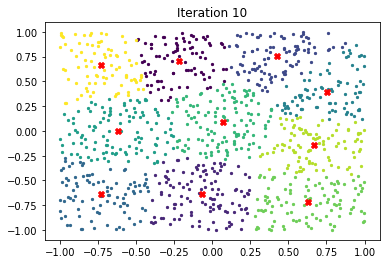

In [21]:
# Number of randomly generated points
N = 1000

# Number of clusters
K = 10

X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])

# Run the algorithm
ret = k_means_lloyd(X, K)


Next, we try **Gaussian data**. Feel free to play around with the settings!

<Figure size 432x288 with 0 Axes>

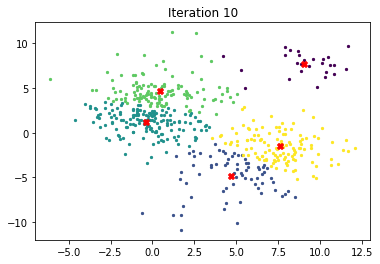

In [28]:
# Randomly select some center points of the data
# Feel free to play around with the settings here
N = 500
K = 5
X = np.zeros((N,2))
xcenters = [random.uniform(-10,10) for i in range(K)]
ycenters = [random.uniform(-10,10) for i in range(K)]
sigmas = [random.uniform(1, 3) for i in range(K)]

# Partition the set {1,...,N} into K sets
partitionlimits = random.sample(range(1,N-1), K-1)
partitionlimits.append(0)
partitionlimits.append(N)
partitionlimits.sort()
for i in range(K): # Generate i-th cluster
    for j in range(partitionlimits[i], partitionlimits[i+1]):
        X[j,] = [random.gauss(xcenters[i], sigmas[i]), random.gauss(ycenters[i], sigmas[i])]

# Run the algorithm
ret = k_means_lloyd(X, K)

Finally, we consider Gaussian data centered around four points, where the algorithm will fail to converge in the sense that it gets "stuck" at a local minimum.

<Figure size 432x288 with 0 Axes>

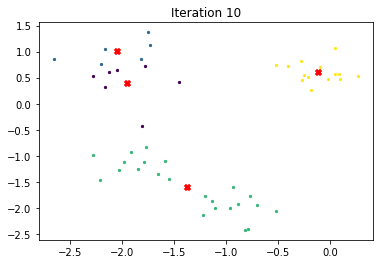

In [40]:
random.seed(50)
K = 4
N = 50
X = np.zeros((N,2))
xcenters = [-2,-1.75,-1,0]
ycenters = [0.75,-1,-2,0.5]
#fixed_starting_points = np.array([[0,0],[0,0],[0,0],[0,0]])
fixed_starting_points = np.array([[-2,0.75],[-2,0.76],[-1.87,-1.5],[0,0.5]])
sigmas = [0.25,0.25,0.25,0.25]
partitionlimits = [0,12,24,36,50]
for i in range(K): # Generate i-th circle
    for j in range(partitionlimits[i], partitionlimits[i+1]):
        X[j,] = [random.gauss(xcenters[i], sigmas[i]), random.gauss(ycenters[i], sigmas[i])]
        
# Run the algorithm
ret = k_means_lloyd(X, K, centers=fixed_starting_points, num_iter=10)

**Note**: Obviously, the example above is very artificial. Nonetheless, this example shows that if possible, the algorithm should be run multiple times with different (random) starting points.